# Oplossingen voorbeeldexamen 2022

In [1]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

## Vraag 1

Dichtbij 0 
Omdat de punten heel hard verspreid zijn, er is geen echt verband. => waarde dichtbij 0  
Het kan niet 0,5 zijn omdat de lijn een beetje daalt.  
R moet negatief want het kleine verband dat zichtbaar is is dalend. => R > 0 => R ligt bij 0 maar aan de onderkant van 0.    
R -> 2 dingen (de sterkte van het verband + of het verband stijgend of dalend is)  

## Vraag 2 (hoofdstuk 1)

Beschouw volgend experiment. In een school met 100 jongens en 100 meisjes gooi je een
muntstuk. Je zet eerst alle jongens en meisjes gesorteerd in twee rijen. Als het op kruis valt
kies je de eerste jongen uit de jongensrij. Als het op munt valt kies je het eerste meisje uit
de meisjesrij. Dit herhaal je tot je 10 leerlingen gevonden hebt en levert je een steekproef van
grootte 10.

(a) Geen aselecte steekproef, want je kiest altijd de eerste uit een gesorteerde lijst.  
(b) Neen. Omwille van antwoord a. Wat er nog positief is: je kiest wel willekeurig meisjes of jongens.  
(c) Systematic sampling error want de achterste hebben sowieso geen kans om gekozen te worden.  

## Vraag 3 (hoofstuk 4)
(a) P(x) < 230 -> 0.048  
(b) P(x > 220) -> 0.994  
(c) P(245 < x < 278) -> 0.652  
(d) [241.906, 258.094]  

In [7]:
m = 250
s = 12

# a
print("1. P(x < 230) ~= %.3f" % stats.norm.cdf(230, loc=m, scale=s))
# b
print("2. P(x > 220) ~= %.3f" % stats.norm.sf(220, loc=m, scale=s))
# c
print("3. P(245 < x < 278) ~= %.3f" % (stats.norm.cdf(278, loc=m, scale=s) - stats.norm.cdf(245, loc=m, scale=s)))
# d
print("ondergrens ~= %.3f" % stats.norm.isf(1-0.25, loc=m, scale=s))
print("bovengrens ~= %.3f" % stats.norm.isf(0.25, loc=m, scale=s))

1. P(x < 230) ~= 0.048
2. P(x > 220) ~= 0.994
3. P(245 < x < 278) ~= 0.652
ondergrens ~= 241.906
bovengrens ~= 258.094


## Vraag 4 (hoofdstuk 3) 

[9.8838, 11.6162]  

In [3]:
df = pd.DataFrame(data={'Months': [
15, 7,13,11,16,11,10, 6,11, 7,
15,14, 7,11,11,10, 8, 9,10,13
]})

df.head()

,Months
0,15
1,7
2,13
3,11
4,16


In [9]:
# Step 1.
m = df.Months.mean()        # Sample mean
s = df.Months.std()         # Population standard deviation
n = df.Months.count()       # Sample size
alpha = .20                 #  1 - alpha is the confidence level want 80% is gevraagd

# Stap 2.
t = stats.t.isf(alpha/2, df = n - 1)
print("t-score: %.5f" % t)

# Stap 3.
lo = m - t * s / np.sqrt(n)
hi = m + t * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

t-score: 1.32773
Confidence interval: [9.8838, 11.6162]


## Vraag 5 (hoofdstuk 5)

(a)  Two sample t test for paired samples  

(b)  H0 = de metingen op het tweede tijdstîp zijn niet significant verschillend van die op het 1ste tijdstip  
H1 = de metingen op het tweede tijdstip zijn significant verschillende van die op het 1ste tijdstip  

(c) pvalue = 0.87 of 87%  

(d) De p-waarde is 87% en is >> (veel groter) 5% => er is niet voldoende bewijs om H0 te verwerpen  

(e) De interkwartielafstand is 16.5  
De kurtosis is 0.158
Het bereik is 45  
De standaardafwijking is 13.097  

In [10]:
df = pd.DataFrame(data={
'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})

df.head()

,time1,time2
0,65,82
1,87,91
2,59,86
3,71,83
4,58,85


In [ ]:
# (a) Welke statistische toets moet je gebruiken om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
# two sample t test for paired samples

In [ ]:
# (b) Formuleer de nulhypothese en de alternatieve hypothese.
# H0 = de metingen op het tweede tijdstîp zijn niet significant verschillend van die op het 1ste tijdstip
# H1 = de metingen op het tweede tijdstip zijn significant verschillende van die op het 1ste tijdstip

In [23]:
# (c) Bereken de p-waarde.
# Measurements:
time1 = np.array(df.time1)
time2 = np.array(df.time2)

# Paired t-test 
s, pvalue = stats.ttest_rel(time1, time2, alternative='two-sided')
print(pvalue)

0.8743994859994443


In [24]:
# (d) Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.
print(f"De p-waarde is {pvalue} en is > 5% => er is niet voldoende bewijs om H0 te verwerpen")

De p-waarde is 0.8743994859994443 en is < 5% => er is niet voldoende bewijs om H0 te verwerpen


In [15]:
# (e) Geef voor de observaties op tijdstip time1:
# (i) De interkwartielafstand
# (ii) De kurtosis
# (iii) Het bereik
# (iv) De standaardafwijking

print(f"De interkwartielafstand is {df.time1.quantile(0.75) - df.time1.quantile(0.25)}") # 3de kwartiel - 1ste kwartiel
print(f"De kurtosis is {df.time1.kurtosis()}")
print(f"Het bereik is {df.time1.max() - df.time1.min()}")
print(f"De standaardafwijking is {df.time1.std(ddof = 1)}")

De interkwartielafstand is 16.5
De kurtosis is 0.15796776764037945
Het bereik is 45
De standaardafwijking is 13.09743704481366


## Vraag 6 (hoofdstuk 4)

(a) chi test^2 - goodness of fit  

(b) H0: de klanten vonden de 3 producten even goed  
 H1: De klanten vonden niet alle 3 de producten even goed  
 
(c)

(d) p waarde = 0.00000017

(e) P-waarde is 0.00000017 is << 0.05 => er is voldoende aanwijzing om de H0 hypothese te verwerpen  
chi^2 is 31.2 is >> 5.99 => er is voldoende aanwijzing om de H0 hypothese te verwerpen  

(f) De klanten hadden zeker niet evenveel voorkeur voor elk van de 3 producten. Er was geen significante voorkeur was voor product C noch voor product b.

In [6]:
df = pd.DataFrame(data={'Choice': [
"Product A","Product A","Product B","Product B","Product C",
"Product B","Product B","Product B","Product C","Product B",
"Product C","Product A","Product C","Product B","Product C",
"Product B","Product C","Product C","Product C","Product B",
"Product C","Product C","Product B","Product C","Product B",
"Product B","Product B","Product B","Product A","Product B",
"Product B","Product B","Product B","Product B","Product C",
"Product C","Product B","Product C","Product C","Product A",
"Product C","Product C","Product B","Product B","Product B",
"Product B","Product C","Product C","Product C","Product C",
"Product C","Product B","Product A","Product C","Product C",
"Product B","Product B","Product C","Product C","Product C",
"Product B","Product C","Product B","Product B","Product C",
"Product B","Product B","Product C","Product C","Product B",
"Product C","Product C","Product C","Product B","Product B",
"Product C","Product C","Product C","Product C","Product C",
"Product C","Product C","Product C","Product C","Product C",
"Product C","Product C","Product C","Product C","Product B"
]})

#df.head()
df.describe()

,Choice
count,90
unique,3
top,Product C
freq,48


In [ ]:
# (a) Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
# chi test^2 - goodness of fit

In [ ]:
# (b) Formuleer de nulhypothese en de alternatieve hypothese
# H0: de klanten vonden de 3 producten even goed
# H1: De klanten vonden niet alle 3 de producten even goed

In [7]:
# (c) Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde
observed = df.Choice.value_counts()
print(observed)
expected_p = np.array([1/3, 1/3, 1/3])


Product C    48
Product B    36
Product A     6
Name: Choice, dtype: int64


In [36]:
# (d) Bereken de p-waarde
alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.8f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 90
k = 3; df = 2
Chi-squared        χ² = 31.2000
Critical value      g = 5.9915
p-value             p = 0.00000017


In [37]:
# (e) Welke conclusie trek je?
print(f"p-waarde is {p} is << 0.05 => er is voldoende aanwijzing om de H0 hypothese te verwerpen")
print(f"chi^2 is {chi2} is >> {g} => er is voldoende aanwijzing om de H0 hypothese te verwerpen")

p-waarde is 1.6788275299956632e-07 is << 0.05 => er is voldoende aanwijzing om de H0 hypothese te verwerpen
chi^2 is 31.2 is >> 5.991464547107983 => er is voldoende aanwijzing om de H0 hypothese te verwerpen


In [ ]:
# (f) Formuleer een antwoord op de onderzoeksvraag.
# De klanten hadden zeker niet evenveel voorkeur voor elk van de 3 producten. Er was geen significante voorkeur was voor product C noch voor product b.

## Vraag 7 (hoofdstuk 6)

(a) De richtingscoefficient is 0.0232   

(b) Het snijpunt met de y-as is: 427.433  

(c) R = 0.0416  

(d) Teken is positief -> stijgend verband  
Grootte van R < 0.3 => zeer zwak verband (zie tabel demo regressie)  

(e) R^2 = 0.0017  

(f) Grootte van R^2 ~ 0 -> zeer zwak verband  
verklaring van de variantie


In [39]:
df = pd.DataFrame(data={
'x': [
394, 369, 393, 442, 371, 416, 477, 406, 422, 459,
410, 433, 365, 454, 373, 400, 354, 422, 399, 365,
367, 428, 423, 336, 400, 425, 429, 413, 395, 474,
405, 410, 383, 359, 429, 372, 331, 476, 395, 339,
417, 347, 414, 444, 390, 389, 467, 386, 371, 367,
378, 447, 432, 382, 339, 341, 401, 430, 386, 413,
435, 414, 433, 435, 362, 356, 386, 322, 455, 384,
321, 416, 390, 411, 397, 483, 405, 367, 367, 406,
394, 424, 389, 333, 442, 422, 381, 450, 390, 392,
368, 381, 406, 337, 419, 397, 427, 368, 501, 435],
'y': [
461, 427, 468, 426, 418, 463, 441, 461, 436, 439,
444, 425, 395, 426, 425, 443, 420, 442, 471, 455,
432, 419, 438, 411, 468, 439, 424, 462, 405, 462,
407, 435, 422, 450, 436, 450, 440, 418, 426, 423,
426, 422, 414, 408, 442, 434, 454, 441, 406, 396,
497, 394, 435, 460, 461, 451, 422, 432, 438, 449,
410, 426, 435, 460, 452, 475, 426, 437, 469, 444,
444, 439, 446, 461, 448, 474, 432, 412, 449, 430,
433, 423, 449, 429, 386, 480, 422, 464, 397, 407,
409, 455, 461, 431, 420, 445, 424, 453, 432, 449]
})
df.head()

,x,y
0,394,461
1,369,427
2,393,468
3,442,426
4,371,418


<AxesSubplot:xlabel='x', ylabel='y'>

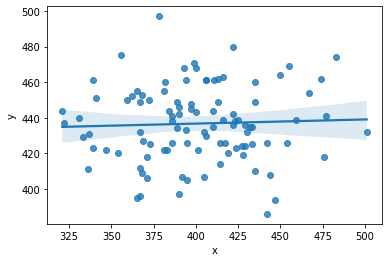

In [41]:
# Plot
sns.regplot(x = df.x, y = df.y)
# Geen sterk verband tussen x en y want de puntjes staan overal -> cor R is dichtbij 0

In [42]:
from sklearn.linear_model import LinearRegression

x = df.x.values.reshape(-1,1)
y = df.y

weight_model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = 427.43 + 0.02 x


In [43]:
# (a) Bereken de richtingscoefficient van de regressierechte
print(f"De richtingscoefficient is {weight_model.coef_[0]}")

De richtingscoefficient is 0.023210537909158984


In [45]:
# (b) Bereken het snijpunt van de regressierechte met de y-as
print(f"Het snijpunt met de y-as is: {weight_model.intercept_}")

Het snijpunt met de y-as is: 427.4330190404864


In [50]:
# Bereken de covariantie (extra)
cov = np.cov(df.x, df.y, ddof=1)[0][1]
print(f"cov = {cov}")

# Interpretatie van de covariantie
# cov > 0 -> stijgend verband, enige dat je kan zien met covariantie
# als cov < 0 -> dalend verband
 

cov = 33.26111111111113


In [46]:
# (c) Bereken de correlatiecoefficient ook wel R (symbool + waarde)
cor = np.corrcoef(df.x, df.y)[0][1]
print(f"R = {cor}")

R = 0.04160588959380872


In [ ]:
# (d) Formuleer een interpretatie voor de waarde van de correlatiecoefficient
# Teken is positief -> stijgend verband
# grootte van R ~ (is ongeveer) 0 => zeer zwak verband (zie tabel demo regressie)

In [47]:
# (e) Bereken de determinatiecoefficient ook wel R^2 (symbool + waarde)
print(f"R^2 = {cor**2}")

R^2 = 0.0017310500488922004


In [ ]:
# (f) Geef een interpretatie voor de waarde van de determinatiecoefficient
# Grootte van R^2 ~ 0 -> zeer zwak verband
# verklaring van de variantie

## Vraag 8 (hoofdstuk 7)

(a) paars -> Eenvoudig voortschrijdend gemiddelde met periode 12  
cyaan -> Enkelvoudige exponentiele afvlakking met α = 0, 1  
rood -> Enkelvoudige exponentiele afvlakking met α = 0, 9  

(b) trend (opwaarts) + geen seasonal component -> Double Exponential Smoothing  

In [ ]:
# (a) Geef voor elk aan over welke vorm het precies gaat. Kies uit de daaronder gegeven mogelijkheden.
# A, paars -> Eenvoudig voortschrijdend gemiddelde met periode 12
#    cyaan -> Enkelvoudige exponenti¨ele afvlakking met α = 0, 1
#    rood -> Enkelvoudige exponenti¨ele afvlakking met α = 0, 9

In [ ]:
# (b) Als je voor deze tijdreeks een model zou moeten opzetten gebaseerd op exponentiele afvlakking, welke zou je dan gebruiken?
# trend (opwaarts) + geen seasonal component -> Double Exponential Smoothing